## **SETUP**
Installing and importing Tensorflow, matplotlib

In [56]:
%pip install --upgrade pip setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
%pip install tensorflow-gpu==2.9.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.9.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.9.0


In [58]:
%pip install opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
%pip list

Package                 Version
----------------------- ---------
absl-py                 2.1.0
aiohttp                 3.9.5
aiosignal               1.3.1
annotated-types         0.6.0
anyio                   4.3.0
asgiref                 3.7.2
assemblyai              0.32.0
asttokens               2.4.1
astunparse              1.6.3
attrs                   23.2.0
axios                   0.4.0
beautifulsoup4          4.12.3
bitsandbytes            0.43.1
blinker                 1.7.0
blis                    0.7.11
catalogue               2.0.10
certifi                 2024.2.2
charset-normalizer      3.3.2
click                   8.1.7
cloudpathlib            0.18.1
colorama                0.4.6
comm                    0.2.2
confection              0.1.5
contourpy               1.2.0
cycler                  0.12.1
cymem                   2.0.8
debugpy                 1.8.5
decorator               5.1.1
distro                  1.9.0
Django                  5.0.1
einops                 

In [60]:
import tensorflow as tf


In [61]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [62]:
tf.config.list_physical_devices('GPU')


[]

## **CLEANING DATA**


In [63]:
#from google.colab import drive
#drive.mount('/content/drive')

In [64]:
import os
filePath = 'data'
os.path.exists(filePath)

True

In [65]:
import cv2
import imghdr

In [66]:

melanoma = os.path.join(filePath, 'melanoma')


In [67]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [68]:
os.path.exists(melanoma)

True

In [69]:
os.listdir(filePath)

['acne', 'healthy skin', 'melanoma']

In [70]:
for image_class in os.listdir(filePath):
    for image in os.listdir(os.path.join(filePath, image_class)):

        image_path = os.path.join(filePath, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(e)
            # os.remove(image_path)

# **Loading Data**

In [71]:
import numpy as np
from matplotlib import pyplot as plt

In [72]:
data = tf.keras.utils.image_dataset_from_directory(filePath)

Found 300 files belonging to 3 classes.


In [73]:
data_iterator = data.as_numpy_iterator()

In [74]:
batch  = data_iterator.next()
# Acne (0), Healthy Skin (1), Melanoma (2)
# Caution when running this multiple times


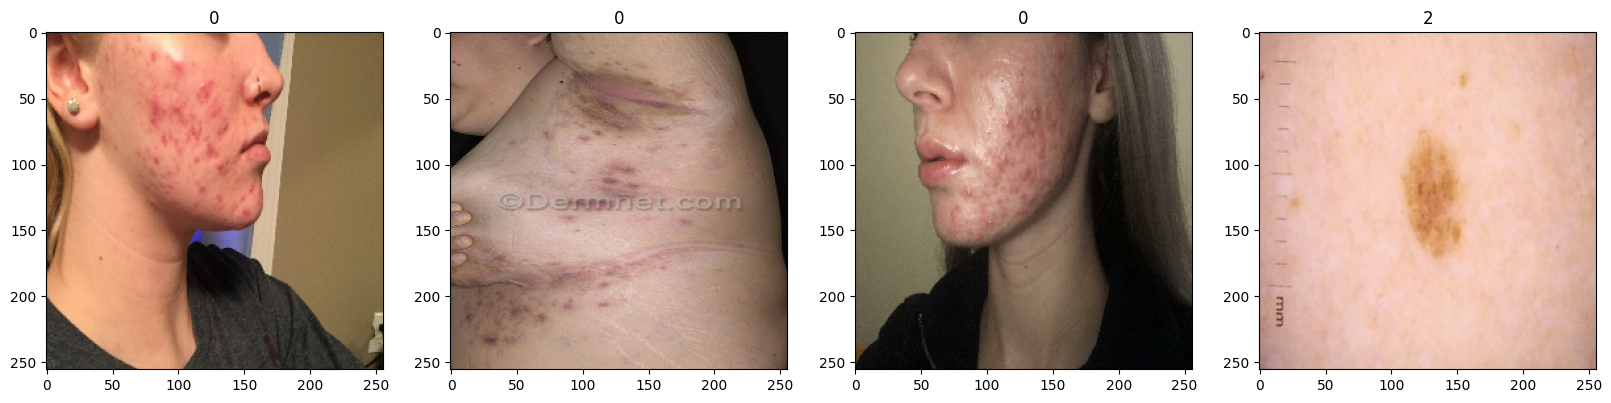

In [75]:
# Preview
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scale Data**

In [76]:
data = data.map(lambda x,y: (x/255, y))


In [77]:
data.as_numpy_iterator().next()


(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [78]:
len(data)

10

# **Split Data**

In [79]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size


7

In [80]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [81]:
len(train)
#len(val)
#len(test)


7

In [82]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [84]:
model = Sequential()

In [85]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
#final layer should match the number of classes

C:\Users\samne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [87]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Train**

In [88]:
logdir='logs'


In [89]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [90]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.3577 - loss: 2.8052 - val_accuracy: 0.4688 - val_loss: 1.0984
Epoch 2/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.3664 - loss: 1.1403 - val_accuracy: 0.6094 - val_loss: 1.0103
Epoch 3/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5234 - loss: 0.9843 - val_accuracy: 0.7344 - val_loss: 0.7597
Epoch 4/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.7329 - loss: 0.7685 - val_accuracy: 0.5312 - val_loss: 0.8576
Epoch 5/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.6727 - loss: 0.7283 - val_accuracy: 0.7812 - val_loss: 0.6049
Epoch 6/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8021 - loss: 0.5257 - val_accuracy: 0.8906 - val_loss: 0.3994
Epoch 7/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.8229 - loss: 0.4956 - val_accuracy: 0.8906 - val_loss: 0.4191
Epoch 8/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.8498 - loss: 0.4330 - val_accuracy: 0.8750 - val_loss:

# **Analysis**

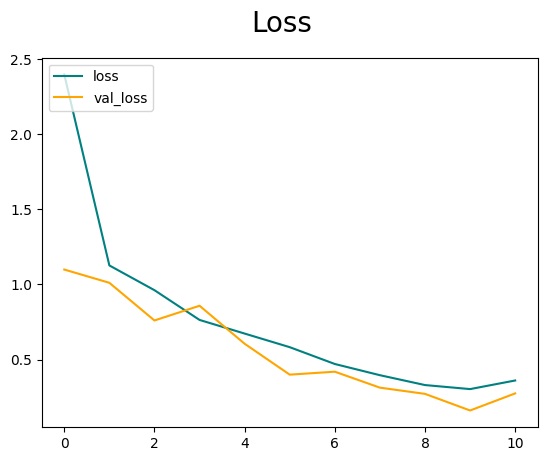

In [91]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate**

In [92]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [93]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,091,419 (42.31 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,394,280 (28.21 MB)

In [94]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [95]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    acc.update_state(y, yhat)
    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format
    re.update_state(y, tf.argmax(yhat, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [96]:
print(pre.result(), re.result(), acc.result())
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

tf.Tensor(0.90909094, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32)
0.90909094 1.0 0.9166667


# **Testing**

In [97]:
import cv2

In [98]:
os.listdir()

['.ipynb_checkpoints',
 'acne-open-comedo-22.jpg',
 'acne_test.jpeg',
 'aiskinsrc.py',
 'data',
 'gender_model.keras',
 'logs',
 'models',
 'skindoctor.ipynb',
 'skindoctor.keras']

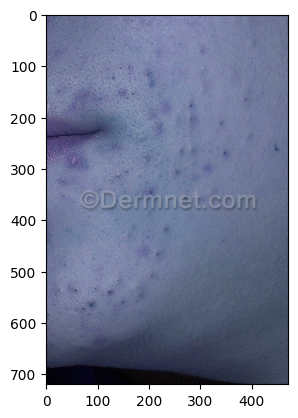

In [99]:
img = cv2.imread('acne-open-comedo-22.jpg')
plt.imshow(img)
plt.show()

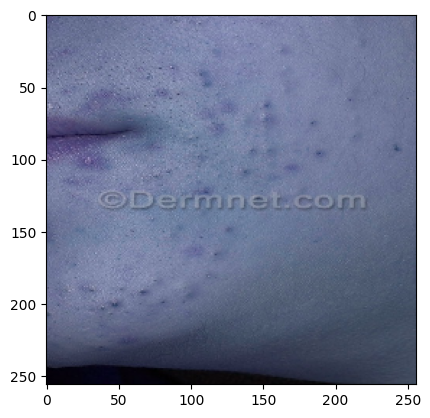

In [100]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [102]:
yhat[0]


array([9.7932947e-01, 2.0668967e-02, 1.5796644e-06], dtype=float32)

In [103]:
predicted_class = np.argmax(yhat, axis=1)
predicted_class

array([0], dtype=int64)

# **Saving Model**

In [104]:
from tensorflow.keras.models import load_model
#os.chdir('/content/drive/MyDrive/skindoctor')
os.getcwd()


'c:\\Users\\samne\\cs projects\\skin doctor AI\\skin-doctor-ai\\skindoctor'

In [105]:
model.save(os.path.join('models','skindoctor.keras'))


In [106]:
#os.path.exists('models')
#os.listdir('models')
os.getcwd()
#does it reset every time you referesh page?( what determines the currentwroking dir)

'c:\\Users\\samne\\cs projects\\skin doctor AI\\skin-doctor-ai\\skindoctor'

In [107]:
os.path.exists('models/skindoctor.keras')

True

In [108]:
new_model = load_model('models/skindoctor.keras')


In [109]:
print(new_model.predict(np.expand_dims(resize/255, 0)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[9.7932947e-01 2.0668967e-02 1.5796644e-06]]
